# dbase_search

Perform a similarity search on a compound database using the RDkit.  Plotting of similarity maps is not included yet.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd

from rdkit.Chem import rdFMCS
from tqdm import tqdm
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs

rdDepictor.SetPreferCoordGen(True)
IPythonConsole.ipython_useSVG = True

The next lines of code are necessary to in order to get mol objects rendered properly in DataFrames.

In [2]:
PandasTools.RenderImagesInAllDataFrames(images=True)

from IPython.core.display import HTML

def show(df):
    return HTML(df.to_html(notebook=True))

Let's load an example compound database.  This one already contains a mol object column.

In [3]:
db_df = pd.read_pickle('58_molobj.pkl')

Let's see what the first 5 compounds look like.

,smiles,molport_id,mol
0,CC(=O)c1ccc(c(c1)OC)O,MolPort-000-000-274,
1,c1ccc2c(c1)CCC(C(=O)N2)N,MolPort-000-000-286,
2,c1cc2c(cc1N)NC(=O)CCC2,MolPort-000-000-287,
3,C1CCCC(CC1)(C(=O)O)N,MolPort-000-000-293,
4,Cc1cc(c2c(n1)CCCC2)N,MolPort-000-000-304,

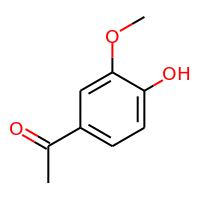
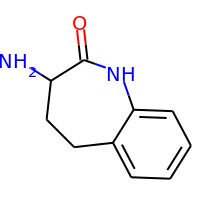
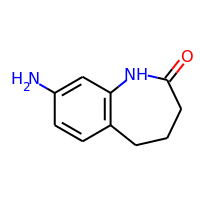
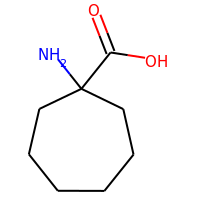
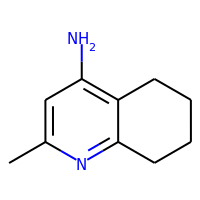

In [4]:
show(db_df.head())

Time to calculate some fingerprints.  We're doing a simple similarity search, so we'll use Morgan Fingerprints with a radius of 2.

In [5]:
db_df['fp_mrgn_2'] = db_df['mol'].map(
                                      lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2)
                                      )

Now let's define a query molecule, calculate its Morgan Fingerprint and perform the similarity search.

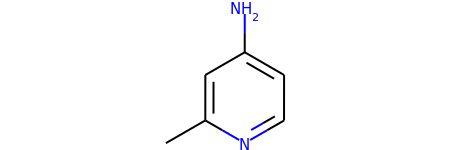

In [6]:
qmol = Chem.MolFromSmiles("Cc1cc(ccn1)N")
qmol

In [7]:
q_fp_mrgn_2 = AllChem.GetMorganFingerprintAsBitVect(qmol, 2)

In [8]:
db_df['fp_mrgn_2_sim'] = [DataStructs.TanimotoSimilarity(q_fp_mrgn_2, x) for x in db_df.fp_mrgn_2]

Sort the results and look at the top 10:

In [9]:
db_df.sort_values("fp_mrgn_2_sim", inplace=True, ascending=False)

In [10]:
top10_df = db_df.head(10)

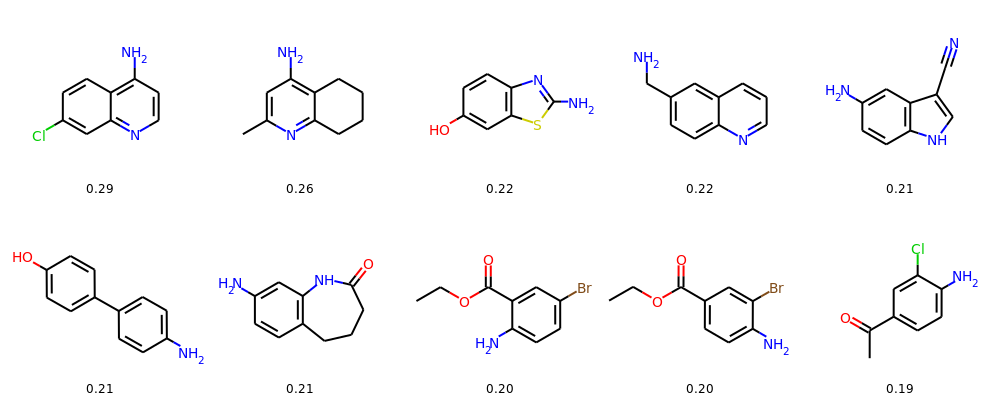

In [11]:
MolsToGridImage(top10_df.mol, molsPerRow=5, legends=["%.2f" % x for x in top10_df.fp_mrgn_2_sim])